## 1- Business Case

The churn rate is most commonly known as the percentage of service subscribers who discontinue their subscriptions within a given time period (usually monthly). For a company to expand its clients, its growth rate (the number of new customers) must exceed its churn rate.

The churn rate not only includes when customers switch carriers, but it also includes when customers terminate service without switching. This measurement is most valuable in subscriber-based businesses in which subscription fees comprise most of the revenues.

Churn rate is an important factor in the telecommunications industry. Many of these companies compete, making it easy for people to transfer from one provider to another.

Research has shown that the average monthly churn rate among the top 4 telecom companies in the US is 1.9% - 2%.

In this business case the churn, one of the biggest problem in the telecom industry, is analysed by visualizing the given dataset to provide a clear view on this matter to the CEO, Sales Manager and Sales team of the company. Based on this top-down analysis, the detailes of demonstrated data is increased from CEO to Sales team to find a clear answer to this question that why churn is happening in our telecom company?


## 2- Importing and clearing Data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

# Input data file

telecom_cust = pd.read_csv('Desktop/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [5]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Explore the data to see if there are any missing values:

In [6]:
#  Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

By looking at the above output, we can say that there are 11 missing values for Total Charges. So removing these 11 rows from our data set

In [10]:
# Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## 3- Presenting Data to the CEO

The CEO needs to have a big picture about Churn Rate.

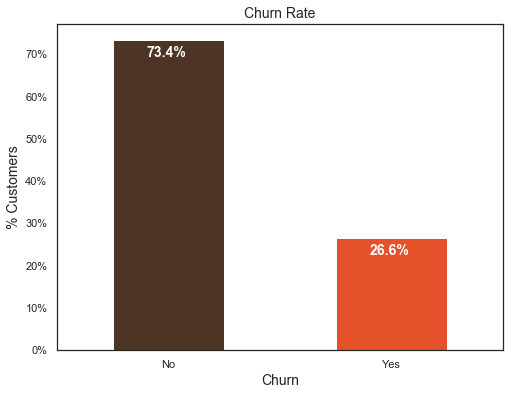

In [21]:

ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar', stacked = True, rot = 0, color = ['#4D3425','#E4512B'], figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

#### >>>> In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. 
The CEO ask the "Sales Manager" to go deeper and find out more details about the cause of current churn rate which is around 27%.

## 4- Presenting Data to Sales Manager

First, we check the correlation of churn with other variabels:

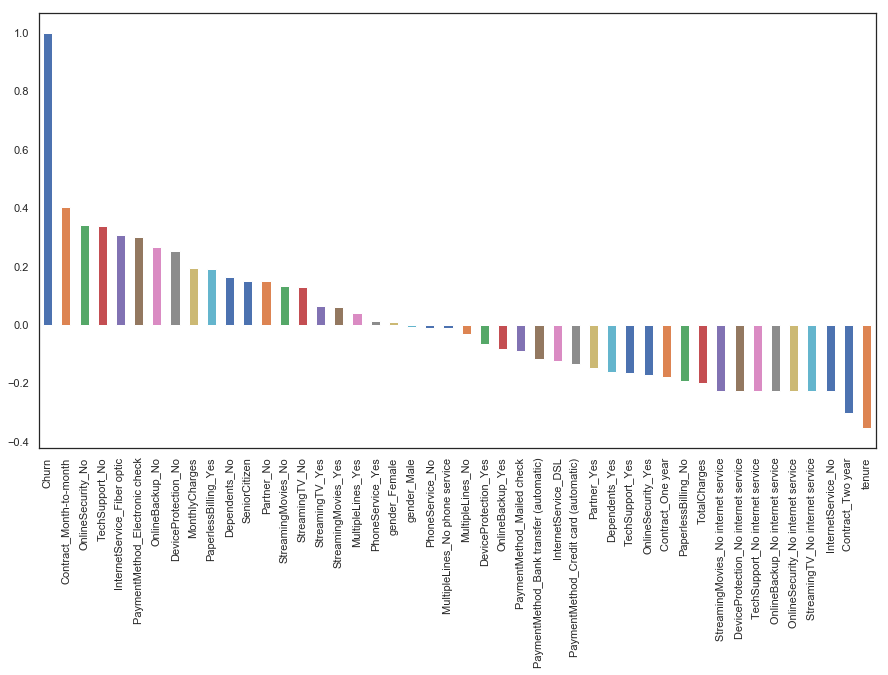

In [22]:
# Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#### >>>> A- 1- Month to month contracts, 2- absence of online security and 3- tech support seem to be positively correlated with churn. While, 1- tenure and 2- two year contracts seem to be negatively correlated with churn.

#### >>>> B- Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

##### We will explore the patterns for the above correlations below before identifying the important variables.

Second, exploring our data set, to better understand the patterns in the data and potentially form some hypothesis.

For this mean, 1- we will look at the distribution of individual variables and 2- looking for any interesting trends.

#### To understand the gender, age range, patner and dependent status of the customers the Sales Manager needs to have a clear view about the Demographics of the cutomers.

#####      1- Gender Distribution

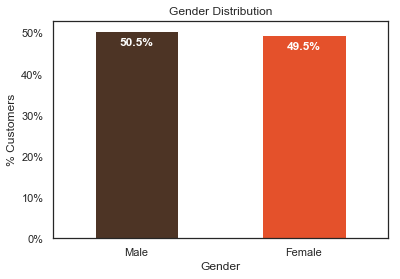

In [23]:

ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar', stacked = True, rot = 0, color = ['#4D3425','#E4512B'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

####  >>>> About half of the customers in our data set are male while the other half are female

#####        2- % Senior Citizens

Text(0.5, 1.0, '% of Senior Citizens')

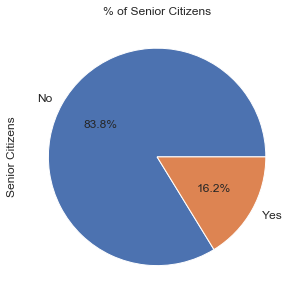

In [24]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

####  >>>> There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

#####      3- Partner and dependent status

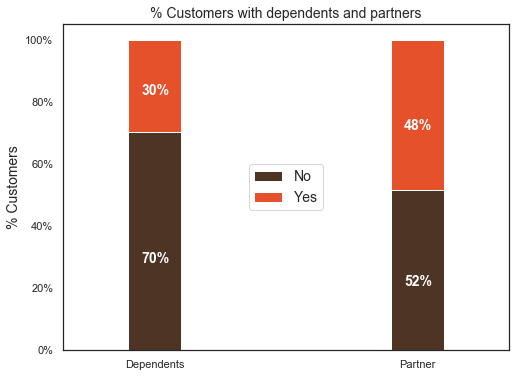

In [25]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

#### >>>> About 50% of the customers have a partner, while only 30% of the total customers have dependents.

What would be interesting is to look at the % of customers, who have partners, also have dependents. We will explore this next.

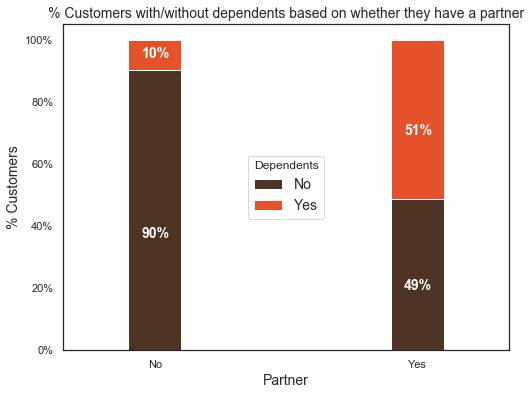

In [27]:

partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0, figsize = (8,6), color = ['#4D3425','#E4512B'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

#### >>>> Interestingly, among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (70%) of them do not have any dependents.

I also looked at any differences between the % of customers with/without dependents and partners by gender. There is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

#### Now exploring the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

#### 1- Churn vs Tenure

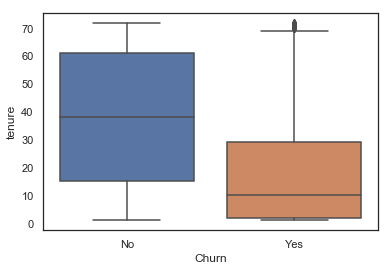

In [28]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

#### >>>> As we can see form the above plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

#### 2- Churn by Seniority

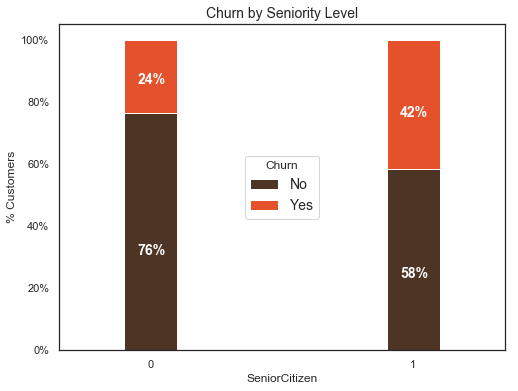

In [30]:

seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0, figsize = (8,6), color = ['#4D3425','#E4512B'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

#### >>>> Senior Citizens have almost double the churn rate than younger population.

#### 3- Churn by Contract Type

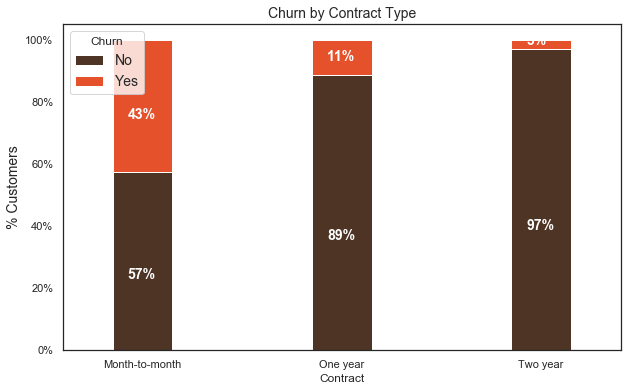

In [29]:

contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6), color = ['#4D3425','#E4512B'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

#### >>>> Higher % of customers churn related to Month-to-Month contract type

Having access to such a great information, Sales Manager decides to ask the Sales Team to go deeper and find detailed information.

## 5- Presenting Data to Sales Team

The Sales Team needs to have information about Customer Account Information so decides to look at the tenure, contract.

#### 1. Tenure

Text(0.5, 1.0, '# of Customers by their tenure')

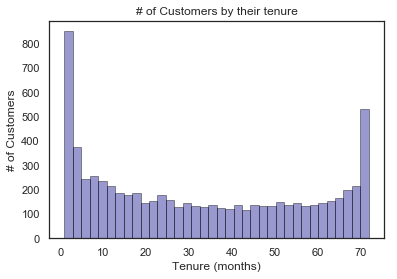

In [31]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

#### >>>> [important] After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

To understand the above graph, lets first look at the # of customers by different contracts.

#### 2- Contract

Text(0.5, 1.0, '# of Customers by Contract Type')

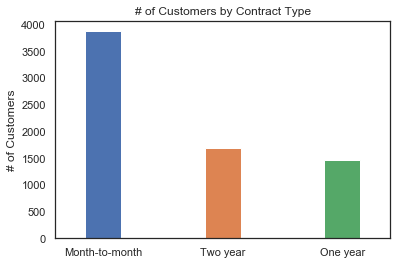

In [32]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

#### >>>> As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

Below we will understand the tenure of customers based on their contract type.

Text(0.5, 1.0, 'Two Year Contract')

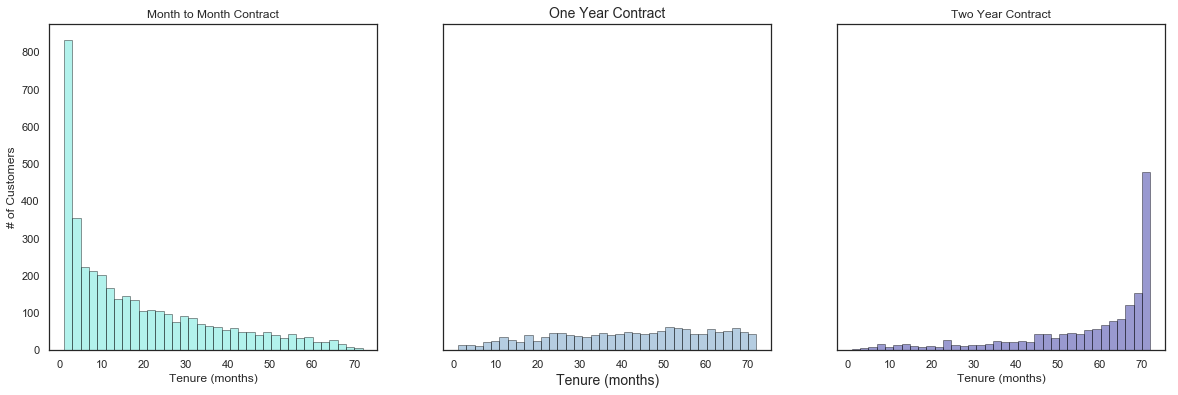

In [33]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

#### >>>> Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

This is also what we saw in the earlier chart on correlation with the churn rate.

So, the Sales Team decides to look at the distribution of various services used by customers

In [34]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

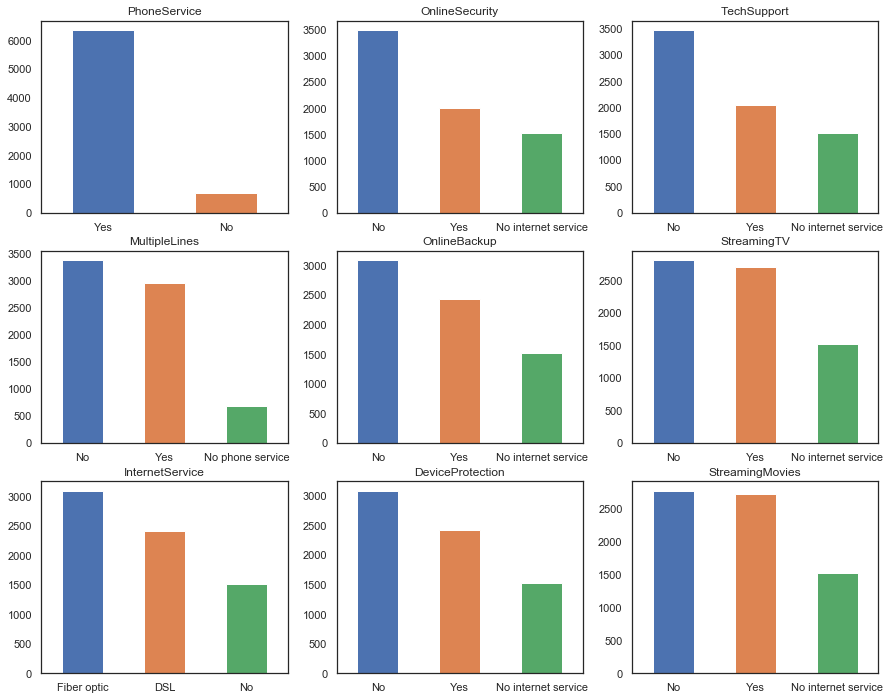

In [35]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

And then take a quick look at the relation between monthly and total charges

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


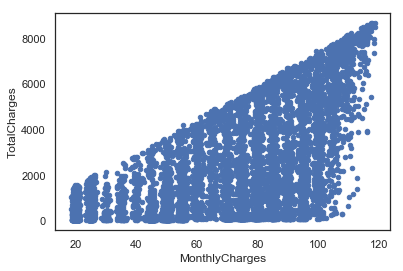

In [36]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')

#### >>>> We observe that the total charges increases as the monthly bill for a customer increases.

Drilling down unveils more information:

#### Churn by Monthly Charges

C:\Users\Reza\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

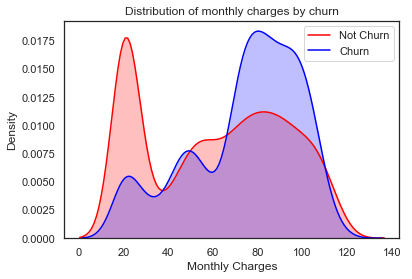

In [37]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ], color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ], ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

#### >>>> Higher % of customers churn happens when the monthly charges are high.

#### Churn by Total Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

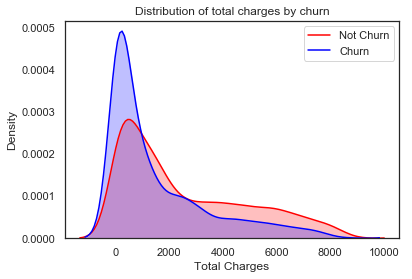

In [38]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ], color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ], ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

#### >>>> Information shows that there is higer churn when the total charges are lower.

## 6- Conclusion

In our designed senario, the "CEO" noticed that there's a 27% churn rate and asked "Sales Manager" to find an answer to this problem. The Sales Manager asked the data scientists for more information about the correlation of churn with other variabels.

He understood that A) 1- Month to month contracts, 2- absence of online security and 3- tech support seem to be positively correlated with churn. While, 1- tenure and 2- two year contracts seem to be negatively correlated with churn. B) Services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

As he had the customers demographic, he cheched the Churn vs Tenure and then Churn by Seniority and Churn by Contract Type. He finally noticed that higher percentage of customers churn is related to month-to-month contract type.

So he asked the "Sales Team" to check the Customer Account Information. The sales team checked the Tenure and quickly  found that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract type, it could be more or less easier for the customers to stay or leave the telecom company. Afterwards, they checked the contracts and as the most of the customers are in the month to month contract, they checked the details of the contracts and found that most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. 

This shown that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. They also checked the distribution of various services used by customers and then take a look at the relation between monthly and total charges that illustrated the total charges increases as the monthly bill for a customer increases. So they saw a clear correlation between the churn and Monthly Charges and Total Charges. The Sales Team came to sum up and unveled that A)higher percentage of customers churn happens when the monthly charges are high and B) when the total charges are lower.

The next step could be cheching/predicting some hypothesis like offering more than one month contract and also special services like fixed-line internet to the customers.